# **QUIZ 2**


Nama : Gaung Taqwa Indraswara

Absen : 6

NIM : 235150207111043

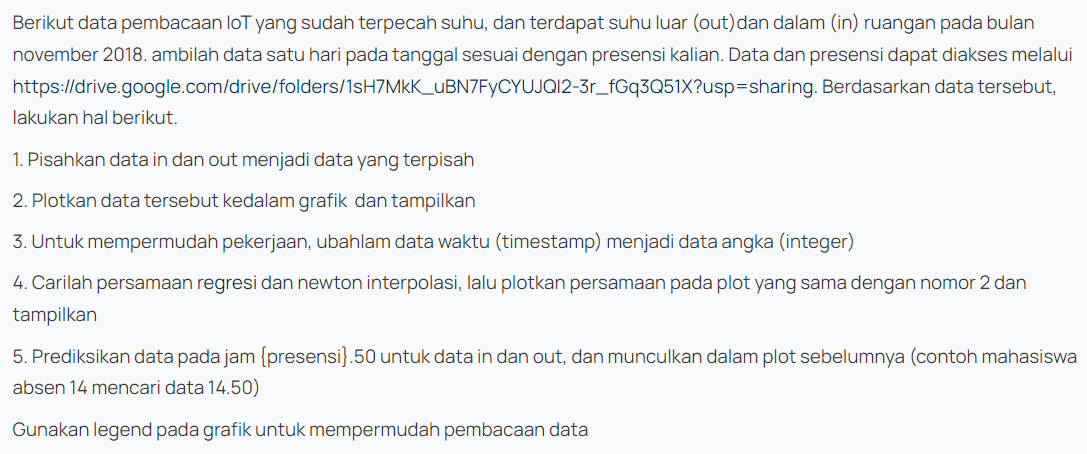

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# **Read dan Manipulasi Data**

In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/arawsardni/Quiz-2-Metnum/main/IOT-temp.csv')

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   noted_date  7371 non-null   object
 1   temp        7371 non-null   int64 
 2   out/in      7371 non-null   object
dtypes: int64(1), object(2)
memory usage: 172.9+ KB


,noted_date,temp,out/in
0,30-11-2018 23:58,37,Out
1,30-11-2018 23:56,36,Out
2,30-11-2018 23:33,37,Out
3,30-11-2018 23:31,37,Out
4,30-11-2018 23:19,37,Out
...,...,...,...
7366,1/11/2018 0:23,40,Out
7367,1/11/2018 0:13,40,Out
7368,1/11/2018 0:09,39,Out
7369,1/11/2018 0:07,40,Out


In [120]:
# Mengubah noted_date ke tipe data string
df['noted_date'] = df['noted_date'].astype(str)

# Membuat kolom baru 'waktu'
df['waktu'] = df['noted_date'].str.split().str[1]

# Mengubah waktu menjadi integer
df['waktu'] = df['waktu'].str.replace(':', '').astype(int)

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   noted_date  7371 non-null   object
 1   temp        7371 non-null   int64 
 2   out/in      7371 non-null   object
 3   waktu       7371 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 230.5+ KB


,noted_date,temp,out/in,waktu
0,30-11-2018 23:58,37,Out,2358
1,30-11-2018 23:56,36,Out,2356
2,30-11-2018 23:33,37,Out,2333
3,30-11-2018 23:31,37,Out,2331
4,30-11-2018 23:19,37,Out,2319
...,...,...,...,...
7366,1/11/2018 0:23,40,Out,23
7367,1/11/2018 0:13,40,Out,13
7368,1/11/2018 0:09,39,Out,9
7369,1/11/2018 0:07,40,Out,7


# **Ambil Data Sesuai Nomer Absen**

In [121]:
# Filter data untuk tanggal 6
df_filtered = df[df['noted_date'].str[0] == '6']

df_filtered

,noted_date,temp,out/in,waktu


karena tidak ada data dengan tanggal 6 saya menggunakan tanggal 5

In [122]:
# Filter data untuk tanggal 5
df_filtered = df[df['noted_date'].str[0] == '5']

df_filtered

,noted_date,temp,out/in,waktu
5196,5/11/2018 20:03,41,Out,2003
5197,5/11/2018 20:01,41,Out,2001
5198,5/11/2018 19:59,40,Out,1959
5199,5/11/2018 19:57,41,Out,1957
5200,5/11/2018 19:56,32,In,1956
...,...,...,...,...
5497,5/11/2018 0:20,42,Out,20
5498,5/11/2018 0:18,41,Out,18
5499,5/11/2018 0:14,42,Out,14
5500,5/11/2018 0:02,32,In,2


# **Memisahkan Data In dan Data Out**

In [123]:
# Memisahkan data menjadi df_in dan df_out
df_in = df_filtered[df_filtered['out/in'] == 'In']
df_out = df_filtered[df_filtered['out/in'] == 'Out']

df_in

,noted_date,temp,out/in,waktu
5200,5/11/2018 19:56,32,In,1956
5204,5/11/2018 19:44,32,In,1944
5223,5/11/2018 18:58,32,In,1858
5246,5/11/2018 17:58,32,In,1758
5261,5/11/2018 17:18,32,In,1718
5265,5/11/2018 17:08,32,In,1708
5266,5/11/2018 17:06,32,In,1706
5267,5/11/2018 17:04,32,In,1704
5277,5/11/2018 16:38,32,In,1638
5307,5/11/2018 14:54,32,In,1454


In [124]:
df_out

,noted_date,temp,out/in,waktu
5196,5/11/2018 20:03,41,Out,2003
5197,5/11/2018 20:01,41,Out,2001
5198,5/11/2018 19:59,40,Out,1959
5199,5/11/2018 19:57,41,Out,1957
5201,5/11/2018 19:53,41,Out,1953
...,...,...,...,...
5495,5/11/2018 0:26,42,Out,26
5497,5/11/2018 0:20,42,Out,20
5498,5/11/2018 0:18,41,Out,18
5499,5/11/2018 0:14,42,Out,14


# **Membuat Scatter Plot Data In dan Out**

**Data In**

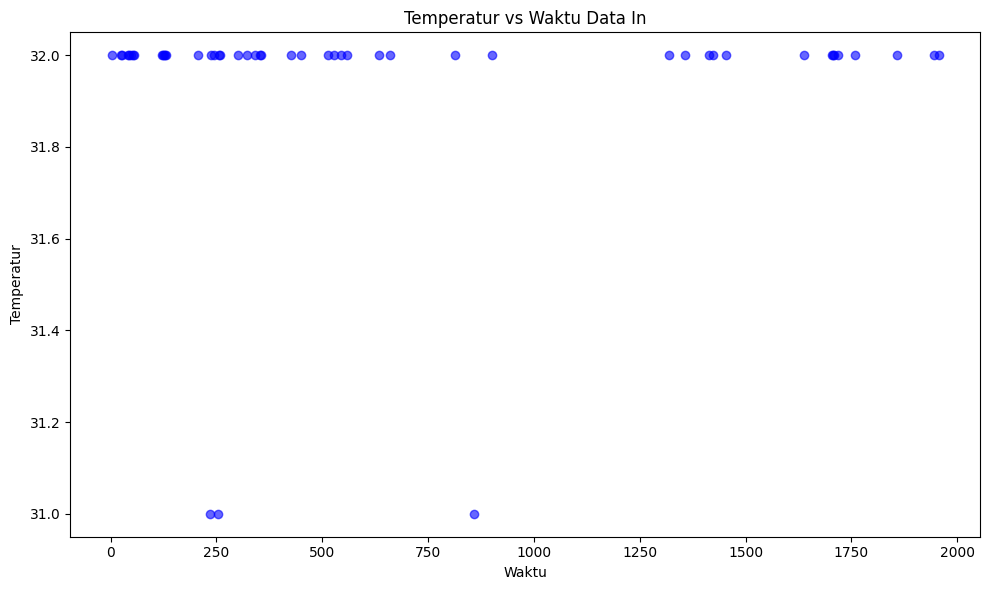

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(df_in['waktu'], df_in['temp'], color='blue', alpha=0.6)

plt.title('Temperatur vs Waktu Data In')
plt.xlabel('Waktu')
plt.ylabel('Temperatur')

plt.tight_layout()
plt.show()

**Data Out**

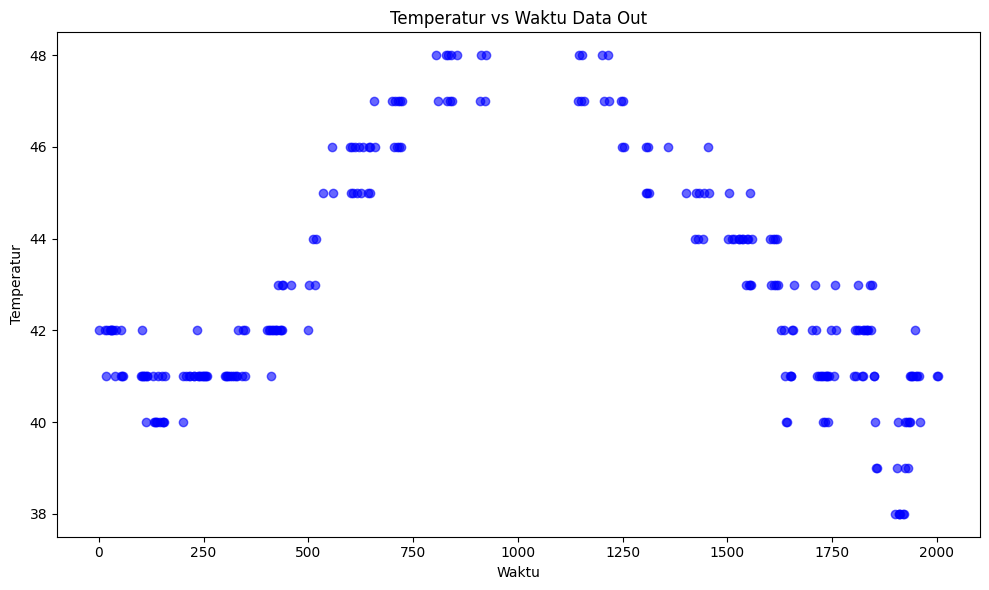

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(df_out['waktu'], df_out['temp'], color='blue', alpha=0.6)

plt.title('Temperatur vs Waktu Data Out')
plt.xlabel('Waktu')
plt.ylabel('Temperatur')

plt.tight_layout()
plt.show()

# **Mengisi Nilai X dan Y untuk Regresi Linear dan Interpolasi Newton**

In [127]:
x_in = np.array(df_in['waktu'])
y_in = np.array(df_in["temp"])

x_out = np.array(df_out['waktu'])
y_out = np.array(df_out["temp"])

# Urutkan data berdasarkan x ascending
sort_indices = np.argsort(x_in)
x_in = x_in[sort_indices]
y_in = y_in[sort_indices]

sort_indices = np.argsort(x_out)
x_out = x_out[sort_indices]
y_out = y_out[sort_indices]

In [128]:
# test
x_out

array([   0,   14,   18,   20,   26,   28,   30,   32,   34,   38,   40,
         52,   54,   56,   58,  100,  102,  104,  106,  108,  110,  112,
        114,  116,  130,  132,  134,  136,  138,  142,  146,  150,  152,
        154,  156,  158,  200,  202,  208,  216,  218,  226,  228,  234,
        236,  240,  242,  246,  248,  250,  254,  256,  258,  302,  304,
        306,  308,  314,  318,  322,  328,  330,  332,  342,  344,  348,
        350,  402,  406,  408,  412,  414,  416,  420,  422,  424,  428,
        432,  434,  436,  438,  440,  458,  500,  502,  512,  516,  518,
        534,  556,  558,  600,  602,  604,  606,  612,  616,  620,  626,
        630,  642,  644,  646,  648,  656,  658,  700,  704,  706,  712,
        714,  716,  718,  722,  724,  804,  810,  828,  830,  834,  838,
        840,  842,  856,  910,  912,  922,  924, 1143, 1147, 1151, 1153,
       1157, 1201, 1205, 1215, 1217, 1247, 1249, 1251, 1253, 1305, 1307,
       1309, 1311, 1313, 1359, 1401, 1423, 1425, 14

# **Menentukan X Target Sesuai Absen (6)**

X Target = {absensi}.50 =  Jam 6.50
= 650

In [129]:
x_target = 650

# **Rumus Regresi Linear**

In [130]:
# Fungsi untuk menghitung koefisien regresi linear
def regresi_linear(x, y):
    n = len(x)

    # Menghitung rata-rata x dan y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Menghitung sigma xi, sigma yi, sigma xiyi, dan sigma xi^2
    sigma_x = np.sum(x)
    sigma_y = np.sum(y)
    sigma_xy = np.sum(x * y)
    sigma_x2 = np.sum(x ** 2)

    # Menghitung a1
    a1 = (n * sigma_xy - sigma_x * sigma_y) / (n * sigma_x2 - sigma_x ** 2)

    # Menghitung a0
    a0 = y_mean - a1 * x_mean

    return a0, a1

# Fungsi untuk membuat prediksi
def predict(a0, a1, x):
    return a0 + a1 * x

# **Prediksi Temperatur Menggunakan Regresi Linear**

**Data In**

In [131]:
# Menghitung koefisien regresi linear
a0_in, a1_in = regresi_linear(x_in, y_in)

print(f"Rumus regresi linear Data In : f(x) = {a0_in} + {a1_in}x")

# Test penggunaan prediksi
y_pred = predict(a0_in, a1_in, x_target)
print(f"Prediksi nilai y Data In untuk x = {x_target} : {y_pred}")

Rumus regresi linear Data In : f(x) = 31.91673261321341 + 3.4090410224742434e-05x
Prediksi nilai y Data In untuk x = 650 : 31.93889137985949


**Data Out**

In [132]:
# Menghitung koefisien regresi linear
a0_out, a1_out = regresi_linear(x_out, y_out)

print(f"Rumus regresi linear Data Out : f(x) = {a0_out} + {a1_out}x")

# Test penggunaan prediksi
x_test = 650
y_pred = predict(a0_out, a1_out, x_test)
print(f"Prediksi nilai y Data Out untuk x = {x_test} : {y_pred}")

Rumus regresi linear Data Out : f(x) = 42.97480491357219 + -0.00021250653346727895x
Prediksi nilai y Data Out untuk x = 650 : 42.836675666818465


# **Plot Regresi Linear**

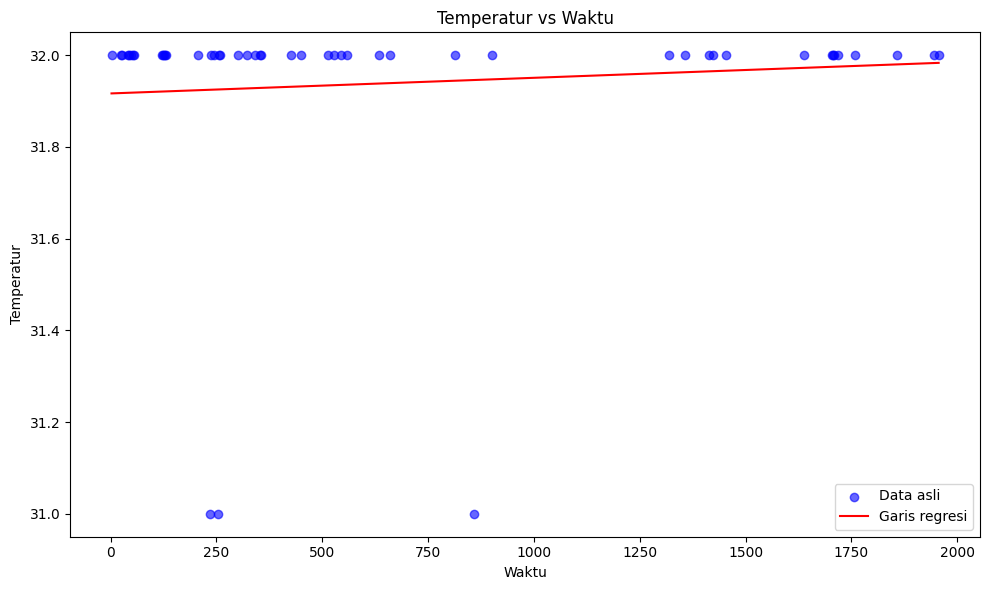

In [133]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_in['waktu'], df_in['temp'], color='blue', alpha=0.6, label='Data asli')

# Membuat garis regresi
x_garis = np.linspace(min(x_in), max(x_in), 100)
y_garis = predict(a0_in, a1_in, x_garis)
plt.plot(x_garis, y_garis, color='red', label='Garis regresi')

plt.title('Temperatur vs Waktu')
plt.xlabel('Waktu')
plt.ylabel('Temperatur')
plt.legend()

plt.tight_layout()
plt.show()

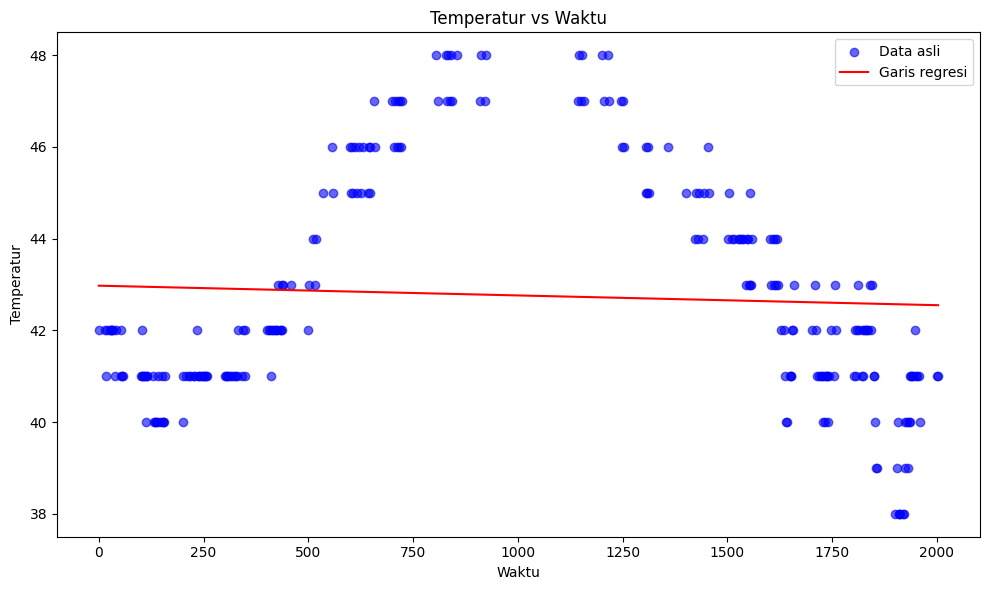

In [134]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_out['waktu'], df_out['temp'], color='blue', alpha=0.6, label='Data asli')

# Membuat garis regresi
x_garis = np.linspace(min(x_out), max(x_out), 100)
y_garis = predict(a0_out, a1_out, x_garis)
plt.plot(x_garis, y_garis, color='red', label='Garis regresi')

plt.title('Temperatur vs Waktu')
plt.xlabel('Waktu')
plt.ylabel('Temperatur')
plt.legend()

plt.tight_layout()
plt.show()

# **Rumus Interpolasi Newton**

In [135]:
# Interpolasi Newton derajat dua
def interpolasi_newton(x, y, x_target):
    n = len(x)
    selisih_terbagi = np.zeros((n, n))
    selisih_terbagi[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            selisih_terbagi[i, j] = (selisih_terbagi[i + 1, j - 1] - selisih_terbagi[i, j - 1]) / (x[i + j] - x[i])

    koefisien = selisih_terbagi[0, :]

    nilai_interpolasi = koefisien[0]
    for i in range(1, 3):  # derajat dua
        term = koefisien[i]
        for j in range(i):
            term *= (x_target - x[j])
        nilai_interpolasi += term

    return nilai_interpolasi

# **Prediksi Temperatur Menggunakan Interpolasi Newton**

In [136]:
hasil_newton_in = interpolasi_newton(x_in, y_in, x_target)

print(f"Interpolasi Newton derajat dua untuk Y Data In: {hasil_newton_in}")

Interpolasi Newton derajat dua untuk Y Data In: 32.0


In [137]:
hasil_newton_out = interpolasi_newton(x_out, y_out, x_target)

print(f"Interpolasi Newton derajat dua untuk Y Data Out: {hasil_newton_out}")

Interpolasi Newton derajat dua untuk Y Data Out: -5699.666666666666


# **Plot Interpolasi Newton**

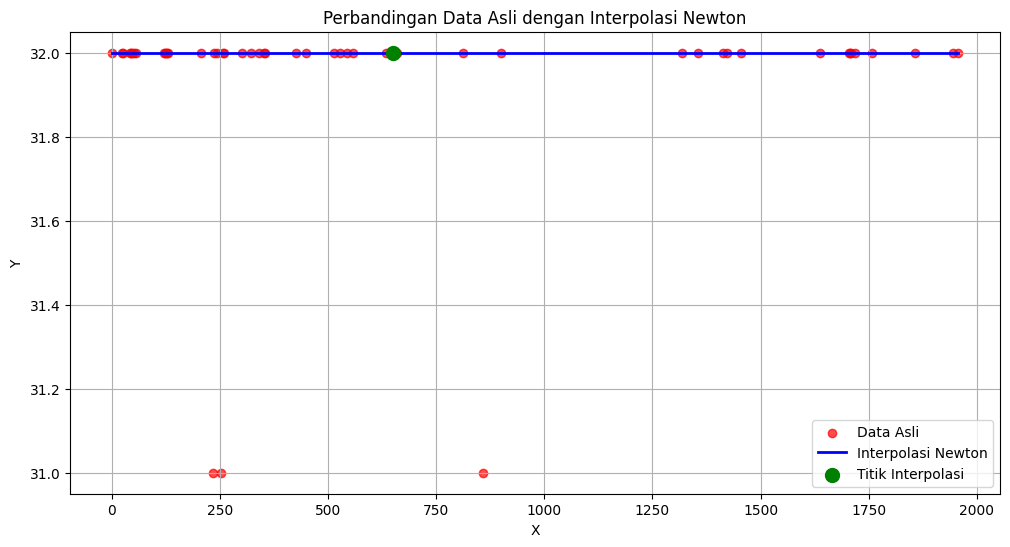

In [138]:
# Buat array x untuk plot interpolasi
x_interp = np.linspace(min(x_in), max(x_in), 100)

# Hitung nilai y interpolasi untuk setiap x
y_interp = [interpolasi_newton(x_in, y_in, xi) for xi in x_interp]

# Plot
plt.figure(figsize=(12, 6))

# Plot data asli
plt.scatter(x_in, y_in, color='red', label='Data Asli', alpha=0.7)

# Plot hasil interpolasi
plt.plot(x_interp, y_interp, color='blue', label='Interpolasi Newton', linewidth=2)

# Tambahkan titik interpolasi target jika ada
if 'x_target' in locals():
    plt.scatter(x_target, hasil_newton_in, color='green', s=100, label='Titik Interpolasi', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perbandingan Data Asli dengan Interpolasi Newton')
plt.legend()
plt.grid(True)

plt.show()

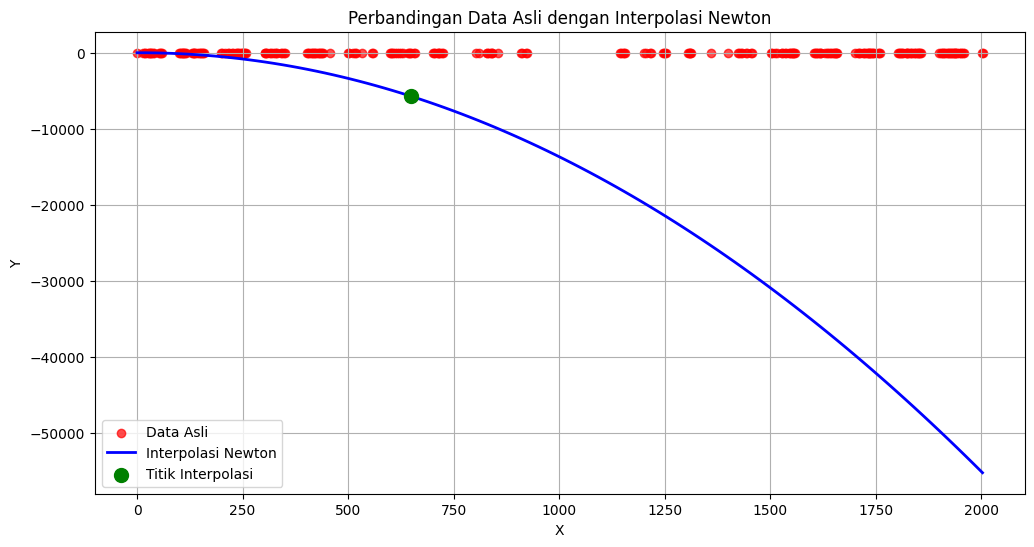

In [139]:
# Buat array x untuk plot interpolasi
x_interp = np.linspace(min(x_out), max(x_out), 100)

# Hitung nilai y interpolasi untuk setiap x
y_interp = [interpolasi_newton(x_out, y_out, xi) for xi in x_interp]

# Plot
plt.figure(figsize=(12, 6))

# Plot data asli
plt.scatter(x_out, y_out, color='red', label='Data Asli', alpha=0.7)

# Plot hasil interpolasi
plt.plot(x_interp, y_interp, color='blue', label='Interpolasi Newton', linewidth=2)

# Tambahkan titik interpolasi target jika ada
if 'x_target' in locals():
    plt.scatter(x_target, hasil_newton_out, color='green', s=100, label='Titik Interpolasi', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perbandingan Data Asli dengan Interpolasi Newton')
plt.legend()
plt.grid(True)

plt.show()

# **Tambahan**

Karena jumlah data yang terlalu banyak, rentang nilai x yang terlalu lebar, dan juga overfitting metode interpolasi polinomial newton menjadi tidak stabil dan menghasilkan osilasi yang berlebihan. Sehingga saya juga mencoba menggunakan cubic spline interpolation agar kurva yang dihasilkan lebih stabil dan lebih halus


Prediksi nilai y untuk x = 650: 31.991


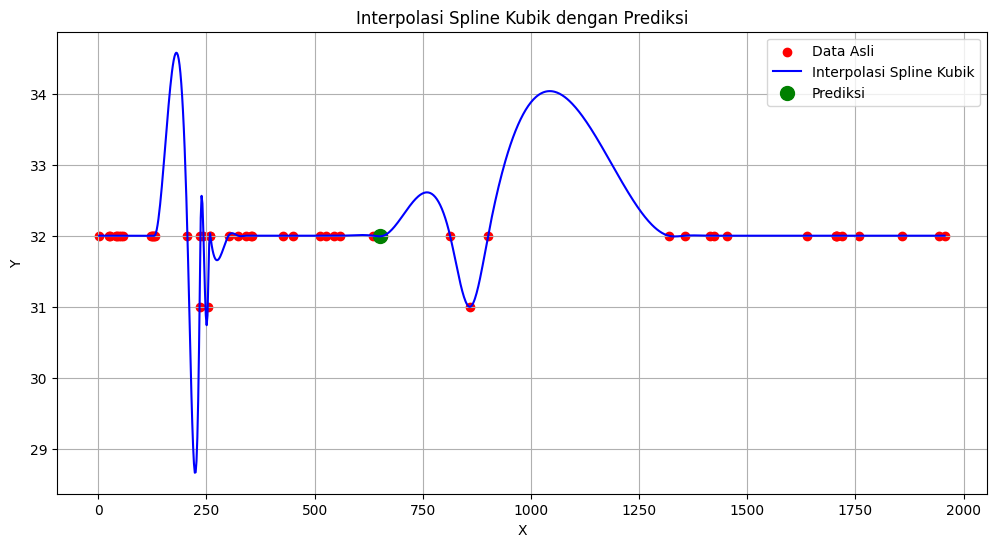

In [140]:
# inisisai untuk data in
sort_indices = np.argsort(x_in)
x = x_in[sort_indices]
y = y_in[sort_indices]

# Buat interpolasi spline kubik
cs = CubicSpline(x, y)

# Buat titik-titik untuk interpolasi
x_interp = np.linspace(x.min(), x.max(), 1000)

# Hitung nilai y untuk titik-titik interpolasi
y_interp = cs(x_interp)

# Prediksi nilai y untuk x = 650
y_predict = cs(x_target)

print(f"Prediksi nilai y untuk x = 650: {y_predict:.3f}")

# Buat plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='red', label='Data Asli')
plt.plot(x_interp, y_interp, color='blue', label='Interpolasi Spline Kubik')
plt.scatter(x_target, y_predict, color='green', s=100, label='Prediksi')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolasi Spline Kubik dengan Prediksi')
plt.legend()
plt.grid(True)
plt.show()

Prediksi nilai y untuk x = 650: 47.1566


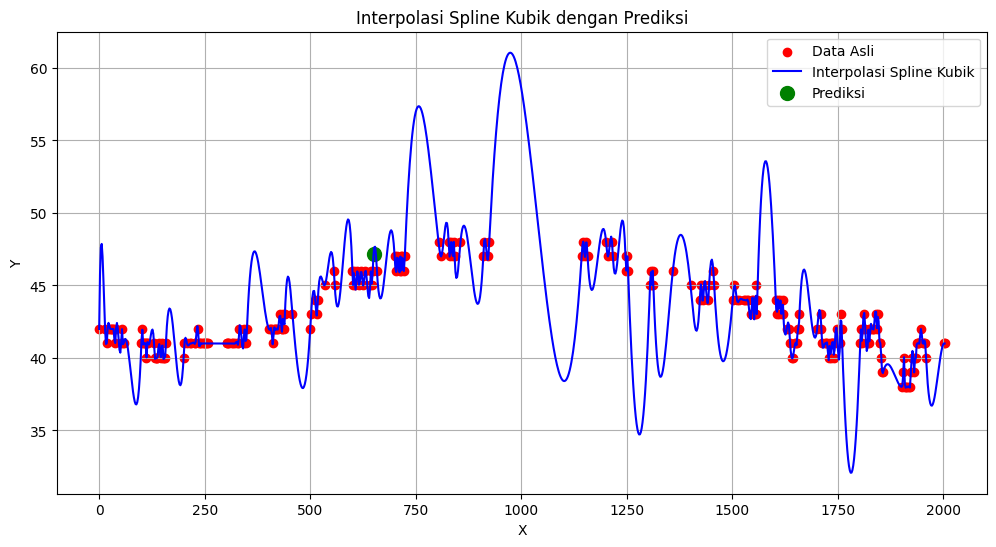

In [141]:
# Inisiasi untuk data out
sort_indices = np.argsort(x_out)
x = x_out[sort_indices]
y = y_out[sort_indices]

# Buat interpolasi spline kubik
cs = CubicSpline(x, y)

# Buat titik-titik untuk interpolasi
x_interp = np.linspace(x.min(), x.max(), 1000)

# Hitung nilai y untuk titik-titik interpolasi
y_interp = cs(x_interp)

# Prediksi nilai y untuk x = 650
y_predict = cs(x_target)

print(f"Prediksi nilai y untuk x = 650: {y_predict:.4f}")

# Buat plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='red', label='Data Asli')
plt.plot(x_interp, y_interp, color='blue', label='Interpolasi Spline Kubik')
plt.scatter(x_target, y_predict, color='green', s=100, label='Prediksi')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolasi Spline Kubik dengan Prediksi')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Perbandingan Semua Metode**

In [142]:
# Fungsi untuk membuat plot regresi, Newton, dan cubic spline untuk data in dan out
def plot_comparison(x_in, y_in, x_out, y_out, a0_in, a1_in, a0_out, a1_out, method):
    plt.figure(figsize=(14, 10))

    # Data asli
    plt.scatter(x_in, y_in, color='blue', alpha=0.6, label='Data In')
    plt.scatter(x_out, y_out, color='red', alpha=0.6, label='Data Out')

    # Regresi Linear
    x_garis_in = np.linspace(min(x_in), max(x_in), 100)
    y_garis_in = predict(a0_in, a1_in, x_garis_in)
    plt.plot(x_garis_in, y_garis_in, color='darkblue', label='Regresi Linear In')

    x_garis_out = np.linspace(min(x_out), max(x_out), 100)
    y_garis_out = predict(a0_out, a1_out, x_garis_out)
    plt.plot(x_garis_out, y_garis_out, color='darkred', label='Regresi Linear Out')

    if method == 'Newton':
        # Interpolasi Newton
        x_newton_in = np.linspace(min(x_in), max(x_in), 100)
        y_newton_in = [interpolasi_newton(x_in, y_in, xi) for xi in x_newton_in]
        plt.plot(x_newton_in, y_newton_in, color='cyan', label='Interpolasi Newton In')

        x_newton_out = np.linspace(min(x_out), max(x_out), 100)
        y_newton_out = [interpolasi_newton(x_out, y_out, xi) for xi in x_newton_out]
        plt.plot(x_newton_out, y_newton_out, color='orange', label='Interpolasi Newton Out')

    elif method == 'Spline':
        # Interpolasi Cubic Spline
        sort_indices_in = np.argsort(x_in)
        x_in_sorted, y_in_sorted = x_in[sort_indices_in], y_in[sort_indices_in]
        cs_in = CubicSpline(x_in_sorted, y_in_sorted)
        x_spline_in = np.linspace(min(x_in), max(x_in), 1000)
        y_spline_in = cs_in(x_spline_in)
        plt.plot(x_spline_in, y_spline_in, color='cyan', label='Cubic Spline In')

        sort_indices_out = np.argsort(x_out)
        x_out_sorted, y_out_sorted = x_out[sort_indices_out], y_out[sort_indices_out]
        cs_out = CubicSpline(x_out_sorted, y_out_sorted)
        x_spline_out = np.linspace(min(x_out), max(x_out), 1000)
        y_spline_out = cs_out(x_spline_out)
        plt.plot(x_spline_out, y_spline_out, color='orange', label='Cubic Spline Out')

    # Prediksi untuk x = 650
    x_predict = 650
    y_predict_linear_in = predict(a0_in, a1_in, x_predict)
    y_predict_linear_out = predict(a0_out, a1_out, x_predict)

    if method == 'Newton':
        y_predict_method_in = interpolasi_newton(x_in, y_in, x_predict)
        y_predict_method_out = interpolasi_newton(x_out, y_out, x_predict)
    elif method == 'Spline':
        y_predict_method_in = cs_in(x_predict)
        y_predict_method_out = cs_out(x_predict)

    plt.scatter([x_predict]*4,
                [y_predict_linear_in, y_predict_linear_out, y_predict_method_in, y_predict_method_out],
                color=['darkblue', 'darkred', 'cyan', 'orange'],
                marker='x', s=100, zorder=5,
                label='Prediksi (x=650)')

    plt.xlabel('Waktu')
    plt.ylabel('Temperatur')
    plt.title(f'Perbandingan Regresi Linear dan {method} (Data In vs Out)')
    plt.legend()
    plt.grid(True)
    plt.show()

## **Plot Perbandingan Metode Regresi Linear dan Interpolasi Newton**

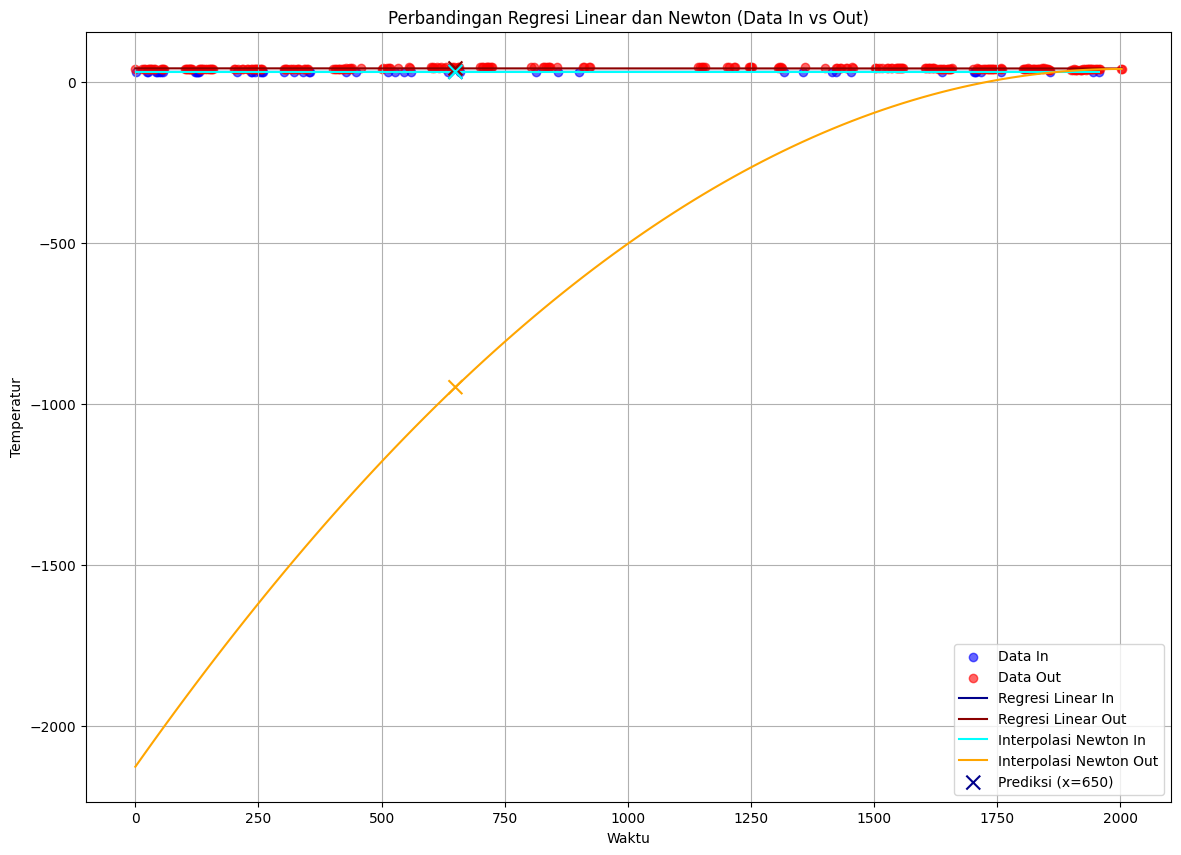

In [143]:
# Plot perbandingan regresi dan Newton untuk data in dan out
plot_comparison(df_in['waktu'].values, df_in['temp'].values,
                df_out['waktu'].values, df_out['temp'].values,
                a0_in, a1_in, a0_out, a1_out, 'Newton')

## **Plot Perbandingan Metode Regresi Linear dan Interpolasi Cubic Spline**

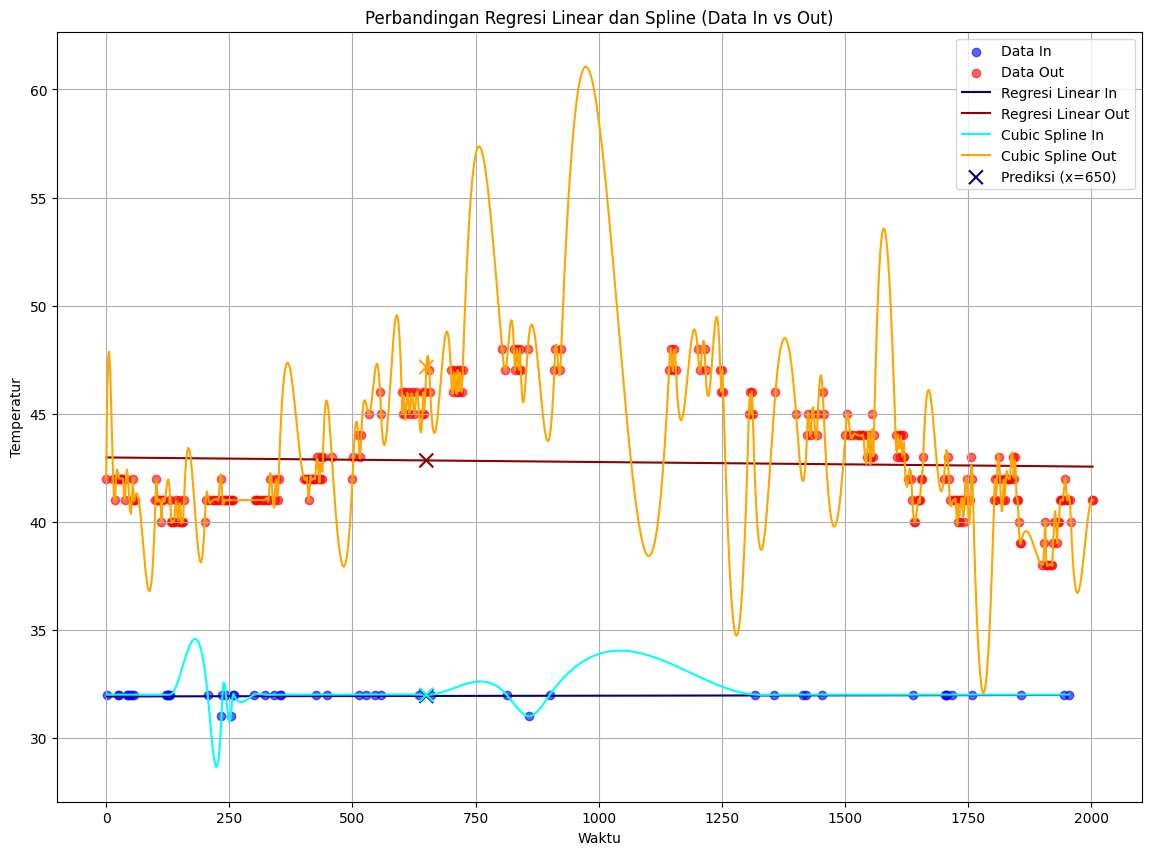

In [144]:
# Plot perbandingan regresi dan cubic spline untuk data in dan out
plot_comparison(df_in['waktu'].values, df_in['temp'].values,
                df_out['waktu'].values, df_out['temp'].values,
                a0_in, a1_in, a0_out, a1_out, 'Spline')